In [2]:
import pandas as pd

df=pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               536 non-null    int64  
 1   Glucose                   536 non-null    int64  
 2   Insulin                   536 non-null    int64  
 3   BMI                       536 non-null    float64
 4   DiabetesPedigreeFunction  536 non-null    float64
 5   Age                       536 non-null    int64  
 6   Outcome                   536 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 29.4 KB


Bayes Gaussian

In [3]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
x=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values
nb.fit(x,y)

GaussianNB()

In [4]:
from sklearn.metrics import accuracy_score

prediksi=nb.predict(x)
akurasi=accuracy_score(y,prediksi)
print(akurasi)

0.7238805970149254


Bayes dengan Bernouli

In [5]:
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()
bnb.fit(x,y)
predik=bnb.predict(x)
akur=accuracy_score(y,predik)
print(akur)

0.5298507462686567


In [6]:
import pickle

pd.to_pickle(nb,'modelnb.pkl')

In [7]:
xte=[[1,89,94,28,0.3,30]]
print(nb.predict(xte))

[0]


In [8]:
print(df)

     Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  Age  \
0              1       85        0  26.6                     0.351   31   
1              1       89       94  28.1                     0.167   21   
2              5      116        0  25.6                     0.201   30   
3             10      115        0  35.3                     0.134   29   
4              4      110        0  37.6                     0.191   30   
..           ...      ...      ...   ...                       ...  ...   
531            1      128      110  36.5                     1.057   37   
532            0      123        0  36.3                     0.258   52   
533            6      190        0  35.5                     0.278   66   
534            9      170        0  44.0                     0.403   43   
535            1      126        0  30.1                     0.349   47   

     Outcome  
0          0  
1          0  
2          0  
3          0  
4          0  
..       

Menjelaskan usia yang sering muncul

<Axes: >

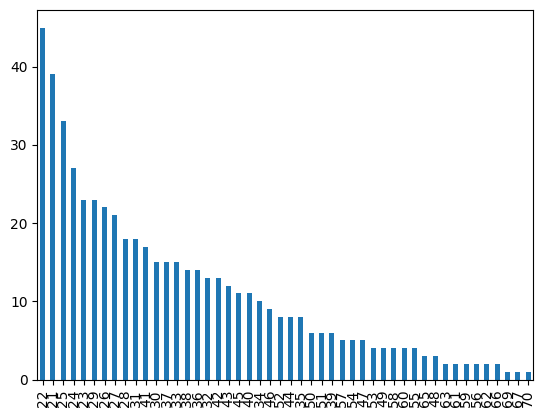

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Age'].value_counts().plot(kind='bar')

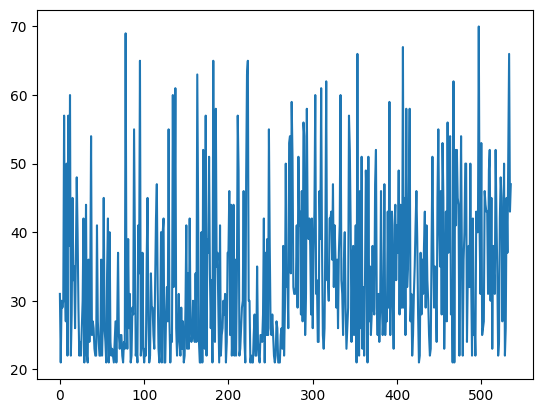

In [10]:
plt.plot(range(len(df)),df['Age'])

<Axes: >

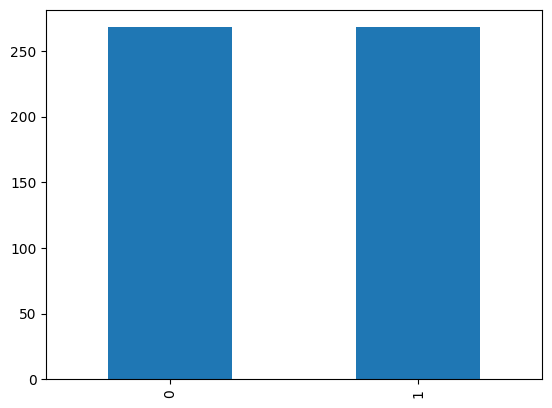

In [11]:
df['Outcome'].value_counts().plot(kind='bar')

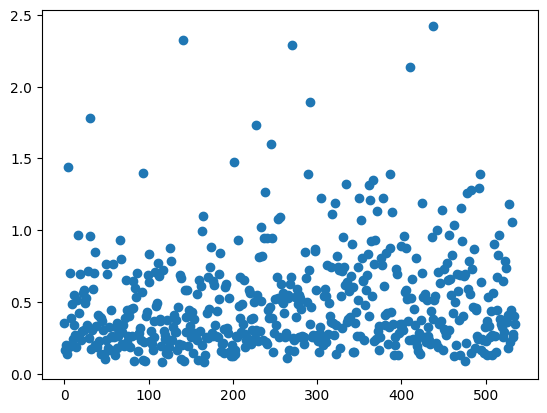

In [12]:
plt.scatter(range(len(df)),df['DiabetesPedigreeFunction'])
plt.show()

Data Tes

In [13]:
dt=pd.read_csv('test.csv')
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               50 non-null     int64  
 1   Glucose                   50 non-null     int64  
 2   Insulin                   50 non-null     int64  
 3   BMI                       50 non-null     float64
 4   DiabetesPedigreeFunction  50 non-null     float64
 5   Age                       50 non-null     int64  
 6   Outcome                   50 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 2.9 KB


In [14]:
xtes=dt.iloc[:,0:-1].values
ytes=dt.iloc[:,-1].values

In [15]:
prediksites=nb.predict(xtes)
akur_tes=accuracy_score(ytes,prediksites)
print(akur_tes)

0.78


In [16]:
print(prediksites)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [17]:
import csv
hasil=pd.DataFrame(prediksites)
hasil.to_csv('hasil.csv')

In [18]:
for i in range(len(prediksites)):
    if(prediksites[i]==0):
        print("Normal")
    else:
        print("Sakit")

Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Sakit
Sakit
Normal
Normal
Normal
Sakit
Normal
Normal
Normal
Sakit
Normal
Normal
Normal
Normal
Sakit
Normal
Sakit
Sakit
Sakit
Normal
Sakit
Normal
Normal
Sakit
Normal
Sakit
Sakit
Sakit
Sakit
Sakit
Sakit
Sakit
Sakit
Sakit
Sakit
Sakit
Sakit
Normal
